#Tarea 6.7

Encuentre un cero de la función

$$
f(x) = 1 - \cos(x) -\frac{\sin(x)}{x}
$$

entre $-6.4$ y $-6.0$ usando el método de Newton y el método de bisección. Grafique el número de iteraciones requerido así como el tiempo requerido en función de la precisión para ambos métodos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Se define la función entregada
def f(x):
    return 1 - np.cos(x) - np.sin(x)/x

#se define la derivada de la función
def df(x):
    return np.sin(x) - np.cos(x)/x + np.sin(x)/x**2


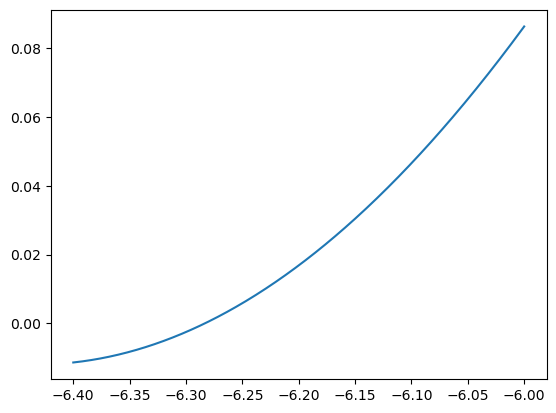

In [3]:
x = np.linspace(-6.4, -6, 500) #Se crea un espacio para poder graficar esta función
plt.plot(x, f(x))
plt.show()
#verificamos que hay un solo cero en el intervalo [-6.4 , -6[

In [4]:
def biseccion(f, a, b, epsilon, N=1000000):
  '''Método de la bisección.
       Tomará una función (f), dos valores del dominio [a,b],
    el error esperado en la medidicion (epsilon) y el numero de mediciones que se hará (N).
    Condiciones importantes:
    f(a) < 0
    f(b) > 0
    f : función
    a y b: límites del intervalos. variables numéricas int o float
    epsilon: error. float.
    -------------------------------------------------------------------------
    Esta funcion tiene con objetivo encontrar la raiz de la funcion en rango
    [a,b].'''
  pp = a
  for i in range(N):
      p = a + (b - a)/2
      if abs(pp - p)/abs(p) < epsilon:
          return p, i+1
      elif f(p)*f(a) > 0:
          a = p
      else:
          b = p
      pp = p
  return None, N


In [5]:
def newton(f, df, po, epsilon, N=1000000):
  ''' Método de Newton
  Encuentra las raíces de una función cerca del punto po
  f: función a la que se buscan los ceros.
  df: derivada de la función.
  po: punto inicial a buscar los ceros, debe estar ya cerca. Variable numérica, int o float
  epsilon: error. Variable numérica float.
  N: número de repeticiones. Int'''

  for i in range(N):
      p = po - f(po)/df(po)
      if abs(p - po)/abs(p) < epsilon:
          return p, i+1
      po = p

  return None, N


In [6]:
biseccion(f, -6.4, -6.0, 0.0001)
 #entrega el valor de x donde la funcion se hace 0 luego de N repeticiones con el método de la biseccion

(-6.283203125, 10)

In [7]:
newton(f, df, (-6.4 + -6.0) / 2, 0.0001)
 #entrega el valor de x donde la funcion se hace 0 luego de N repeticiones con el método de Newton

(-6.283185307173421, 4)

El cero de la función f en el intervalo [-6.4, 6.0[ con un epsilon de $10^{-4}$ se encuentra en:

 $x \approx -6.283203125$ según el método de la bisección,

 para el método de Newton se obtuvo que es en $x \approx -6.283185307173421$

In [8]:
import time

In [9]:
precisiones = [10**(-i) for i in range(1, 11)] # diferentes valores de epsilon para diferentes precisiones
tiempos_biseccion = [] #tiempo que tarda en ejecutarse el metodo de la biseccion para diferentes precisiones
iteraciones_biseccion = [] #números de repeticiones necesarias para encontar el cero de la función con el método de la bisección
tiempos_newton = [] #tiempo que tarda en ejecutarse el metodo de la biseccion para diferentes precisiones
iteraciones_newton = [] #números de repeticiones necesarias para encontar el cero de la función con el método de Newton

for epsilon in precisiones:
    # Método de bisección
    inicio = time.time()
    it_B = biseccion(f, -6.4, -6.0, epsilon)[1] #la biseccion regresa una tupla, el segundo elemento de esta es la que entrega el número de iteraciones
    fin = time.time()
    tiempos_biseccion.append(fin - inicio) #mide el tiempo que tarda en realizarse la biseccion
    iteraciones_biseccion.append(it_B)

    # Método de Newton
    start = time.time()
    it_N = newton(f, df, (-6.4 + -6.0) / 2 , epsilon)[1] #Newton regresa una tupla, el segundo elemento de esta es la que entrega el número de iteraciones
    end = time.time()
    tiempos_newton.append(end - start) #mide el tiempo que tarda en realizarse el método de Newton
    iteraciones_newton.append(it_N)


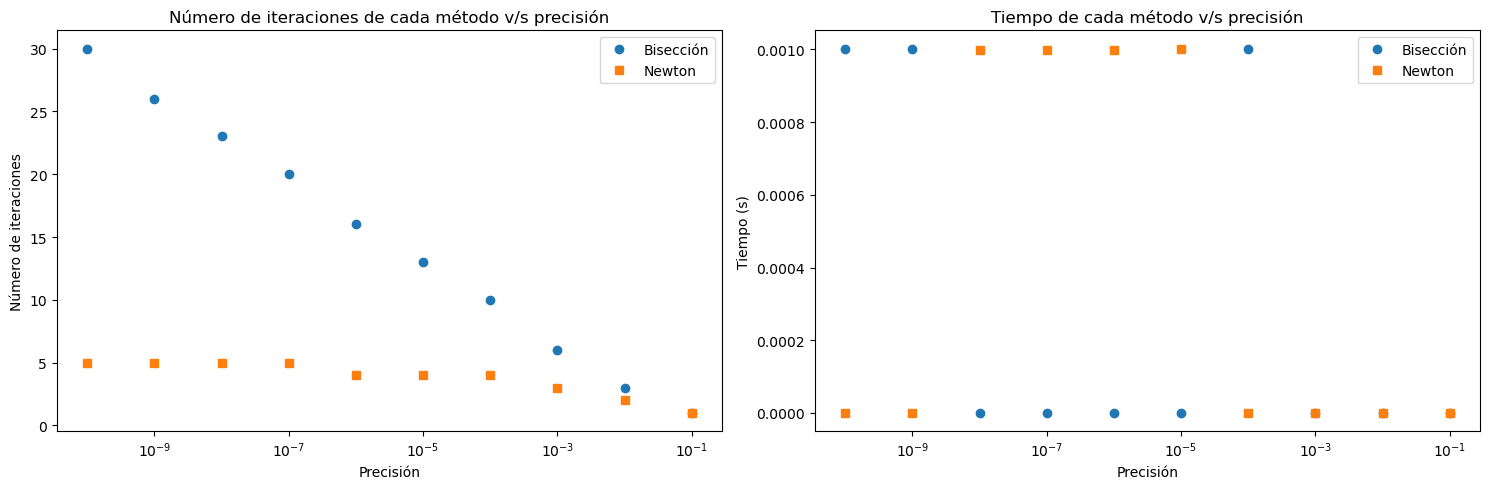

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogx(precisiones, iteraciones_biseccion, 'o', label='Bisección')
#grafica con logaritmo en el eje x, ya que se utilizaron potencias de 10
plt.semilogx(precisiones, iteraciones_newton, 's', label='Newton')
plt.xlabel('Precisión')
plt.ylabel('Número de iteraciones')
plt.legend()
plt.title("Número de iteraciones de cada método v/s precisión")

plt.subplot(1, 2, 2)
plt.semilogx(precisiones, tiempos_biseccion, 'o', label='Bisección')
plt.semilogx(precisiones, tiempos_newton, 's', label='Newton')
plt.xlabel('Precisión')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.title("Tiempo de cada método v/s precisión")

plt.tight_layout()
plt.show() #muestra las gráficas


# Calificacion: 7.0